In [18]:
%load_ext autoreload
%autoreload 2

import os
import json
import copy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ray_results_interpreter as rri
import subprocess
import concurrent.futures
from main_run import MainRun

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


   store_underage_cost                  Architecture Class  omit_context_from_store_input  warehouse_lost_order_average_interval  Train Loss   Dev Loss  Test Loss  # of runs  Test Gap %                                                                                                                                                                                                                                                      path
0                    3          Decentralized_Store_Orders                          False                                   -1.0    5.300345   5.296929   5.295941         15    0.000000   /user/ml4723/Prj/NIC/ray_results/warehouse_communication/decentralized/3/run_2024-11-11_06-31-06/run_71101_00001_1_apply_normalization=False,learning_rate=0.0010,omit_context_from_store_input=False,samples=1,store_holding_cost=_2024-11-11_06-31-07
0                    3   Decentralized_Store_Orders_Lost_3                          False                                    3.0

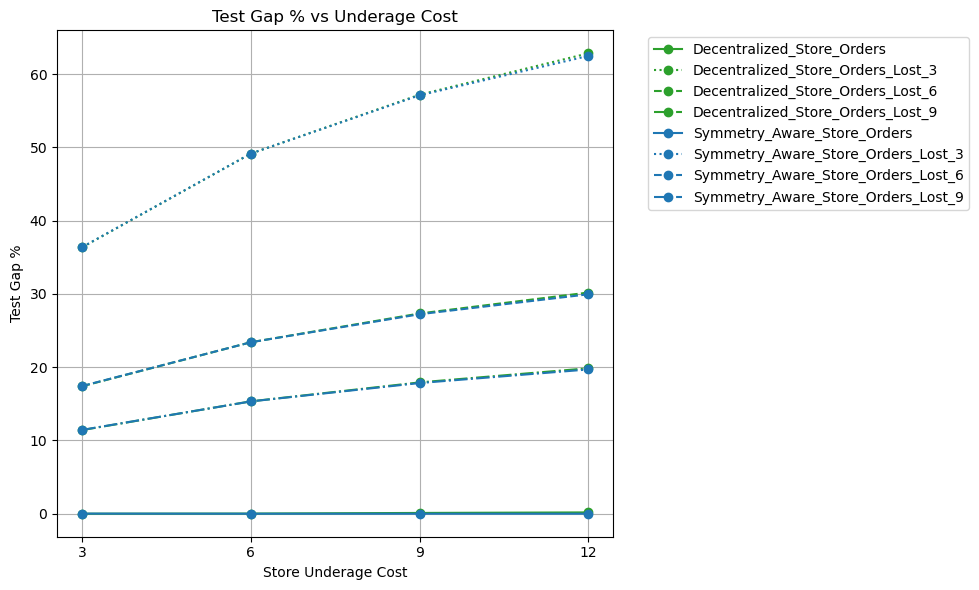

In [19]:
# Define color scheme for architecture types
color_scheme = {
    "Symmetry_Aware_Store_Orders": "#1f77b4",  # Blue
    "Symmetry_Aware_Store_Orders_Lost_3": "#1f77b4",  # Blue
    "Symmetry_Aware_Store_Orders_Lost_6": "#1f77b4",  # Blue
    "Symmetry_Aware_Store_Orders_Lost_9": "#1f77b4",  # Blue
    "Decentralized_Store_Orders": "#2ca02c",  # Green 
    "Decentralized_Store_Orders_Lost_3": "#2ca02c",  # Green
    "Decentralized_Store_Orders_Lost_6": "#2ca02c",  # Green
    "Decentralized_Store_Orders_Lost_9": "#2ca02c",  # Green
    "Vanilla": "#ff7f0e",  # Orange
    "Vanilla_Lost_6": "#ff7f0e"  # Orange
}

linestyle_scheme = {
    "Symmetry_Aware_Store_Orders": "-",  # Solid
    "Symmetry_Aware_Store_Orders_Lost_3": ":",  # Dotted
    "Symmetry_Aware_Store_Orders_Lost_6": "--",  # Dashed
    "Symmetry_Aware_Store_Orders_Lost_9": "-.",  # Dash-dot
    "Decentralized_Store_Orders": "-",  # Solid
    "Decentralized_Store_Orders_Lost_3": ":",  # Dotted
    "Decentralized_Store_Orders_Lost_6": "--",  # Dashed
    "Decentralized_Store_Orders_Lost_9": "-.",  # Dash-dot
    "Vanilla": "-",  # Solid
    "Vanilla_Lost_6": "--",  # Dotted
}

path = 'warehouse_communication'
symmetry_aware_paths = {
    3: f'/user/ml4723/Prj/NIC/ray_results/{path}/symmetry_aware/3',
}
decentralized_paths = {
    3: f'/user/ml4723/Prj/NIC/ray_results/{path}/decentralized/3',
}
vanilla_paths = {
    3: f'/user/ml4723/Prj/NIC/ray_results/{path}/vanilla/3',
}

def custom_data_filler(out_row, reference_row):
    out_row['path'] = reference_row['path']

def default_condition_setter(condition_name):
    if condition_name == 'omit_context_from_store_input':
        return False
    if condition_name == 'warehouse_lost_order_average_interval':
        return -1
    return None

sort_by = 'test_loss'
pick_row_from_run_by = 'test_loss'

store_underage_cost = [3, 6, 9, 12]
results_interpretor = rri.RayResultsinterpreter()

# Symmetry Aware Store Orders without lost orders
df_symmetry_aware_store_orders = results_interpretor.make_table(symmetry_aware_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [-1]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders.insert(1, 'Architecture Class', "Symmetry_Aware_Store_Orders")
df_symmetry_aware_store_orders.insert(1, 'hyperparam_name', "symmetry_aware")

# Symmetry Aware Store Orders with lost orders interval 3
df_symmetry_aware_store_orders_lost_3 = results_interpretor.make_table(symmetry_aware_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [3]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders_lost_3.insert(1, 'Architecture Class', "Symmetry_Aware_Store_Orders_Lost_3")
df_symmetry_aware_store_orders_lost_3.insert(1, 'hyperparam_name', "symmetry_aware")

# Symmetry Aware Store Orders with lost orders interval 6
df_symmetry_aware_store_orders_lost_6 = results_interpretor.make_table(symmetry_aware_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [6]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders_lost_6.insert(1, 'Architecture Class', "Symmetry_Aware_Store_Orders_Lost_6")
df_symmetry_aware_store_orders_lost_6.insert(1, 'hyperparam_name', "symmetry_aware")

# Symmetry Aware Store Orders with lost orders interval 9
df_symmetry_aware_store_orders_lost_9 = results_interpretor.make_table(symmetry_aware_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [9]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_symmetry_aware_store_orders_lost_9.insert(1, 'Architecture Class', "Symmetry_Aware_Store_Orders_Lost_9")
df_symmetry_aware_store_orders_lost_9.insert(1, 'hyperparam_name', "symmetry_aware")

# Decentralized Store Orders without lost orders
df_decentralized_store_orders = results_interpretor.make_table(decentralized_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [-1]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_decentralized_store_orders.insert(1, 'Architecture Class', "Decentralized_Store_Orders")
df_decentralized_store_orders.insert(1, 'hyperparam_name', "decentralized")

# Decentralized Store Orders with lost orders interval 3
df_decentralized_store_orders_lost_3 = results_interpretor.make_table(decentralized_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [3]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_decentralized_store_orders_lost_3.insert(1, 'Architecture Class', "Decentralized_Store_Orders_Lost_3")
df_decentralized_store_orders_lost_3.insert(1, 'hyperparam_name', "decentralized")

# Decentralized Store Orders with lost orders interval 6
df_decentralized_store_orders_lost_6 = results_interpretor.make_table(decentralized_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [6]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_decentralized_store_orders_lost_6.insert(1, 'Architecture Class', "Decentralized_Store_Orders_Lost_6")
df_decentralized_store_orders_lost_6.insert(1, 'hyperparam_name', "decentralized")

# Decentralized Store Orders with lost orders interval 9
df_decentralized_store_orders_lost_9 = results_interpretor.make_table(decentralized_paths, 
    {'store_underage_cost': store_underage_cost, 'apply_normalization': [False], 'store_orders_for_warehouse': [True], 'omit_context_from_store_input': [False], 'warehouse_lost_order_average_interval': [9]}, 
    default_condition_setter, custom_data_filler, sort_by=sort_by, pick_row_from_run_by=pick_row_from_run_by)
df_decentralized_store_orders_lost_9.insert(1, 'Architecture Class', "Decentralized_Store_Orders_Lost_9")
df_decentralized_store_orders_lost_9.insert(1, 'hyperparam_name', "decentralized")


# Combine dataframes
df = pd.concat([
    df_symmetry_aware_store_orders,
    df_symmetry_aware_store_orders_lost_3,
    df_symmetry_aware_store_orders_lost_6,
    df_symmetry_aware_store_orders_lost_9,
    df_decentralized_store_orders,
    df_decentralized_store_orders_lost_3,
    df_decentralized_store_orders_lost_6,
    df_decentralized_store_orders_lost_9,
])

min_test_loss = df.groupby(['store_underage_cost'])['Test Loss'].transform('min')
df['Test Gap %'] = ((df['Test Loss'] - min_test_loss) / min_test_loss) * 100
df.insert(df.columns.get_loc(df.columns[-2]), 'Test Gap %', df.pop('Test Gap %'))
df.drop(columns=['# of stores'], inplace=True)
df.sort_values(by=['store_underage_cost', 'Architecture Class'], inplace=True)
cols = df.columns.tolist()
cols.remove('store_underage_cost')
cols = ['store_underage_cost'] + cols
df = df[cols]

df_to_print = df.copy()
df_to_print.drop(columns=['hyperparam_name', 'Learning Rate', 'apply_normalization', 'store_orders_for_warehouse'], inplace=True)

print(df_to_print.to_string())

# Create the plot for fixed case
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for Test Gap % - handle duplicate entries by taking mean
pivot_df_fixed_test = df.groupby(['store_underage_cost', 'Architecture Class'])['Test Gap %'].mean().unstack()

for column in pivot_df_fixed_test.columns:
    ax.plot(pivot_df_fixed_test.index, pivot_df_fixed_test[column], 
            marker='o', 
            label=column, 
            color=color_scheme[column],
            linestyle=linestyle_scheme[column])

ax.set_xlabel('Store Underage Cost')
ax.set_ylabel('Test Gap %')
ax.set_title('Test Gap % vs Underage Cost')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
ax.set_xticks(pivot_df_fixed_test.index)

plt.tight_layout()
plt.show()

In [20]:
def collect_data_and_plot(df, test_mode, setting_name, n_stores):
    def run_main_run(row):
        try:
            cmd = [
                "/user/ml4723/.conda/envs/neural_inventory_control/bin/python",
                "main_run.py",
                test_mode, # test or test_on_dev
                setting_name,
                row['hyperparam_name'],
                row['path'],
                row['Architecture Class']
            ]
            env = {
                **os.environ,
                "MKL_THREADING_LAYER": "GNU",
                "MKL_SERVICE_FORCE_INTEL": "1"
            }
            subprocess.run(cmd, capture_output=True, text=True, check=True, env=env, cwd="/user/ml4723/Prj/NIC/")
        except subprocess.CalledProcessError as e:
            print(f"Error running main_run.py for path {row['path']}: {e}")
            print(f"Error output: {e.stderr}")
        except Exception as e:
            print(f"Unexpected error running main_run.py for path {row['path']}: {e}")

    def get_file_name(row):
        return f"results/one_warehouse_real/{n_stores}/{row['Architecture Class']}/{row['store_underage_cost']}.csv"
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        futures = []
        for _, row in df.iterrows():
            file_name = get_file_name(row)
            if os.path.exists(file_name):
                continue
            while len(futures) >= 8:
                done, not_done = concurrent.futures.wait(
                    futures, 
                    return_when=concurrent.futures.FIRST_COMPLETED
                )
                futures = list(not_done)
            futures.append(executor.submit(run_main_run, row))
        concurrent.futures.wait(futures)
    
    avg_s_underage = []
    avg_s_holding = []
    avg_w_holding = []
    avg_cost = []
    for _, row in df.iterrows():
        file_name = get_file_name(row)
        data = pd.read_csv(file_name)
        n_samples = 4096
        batch_size = 4096
        num_batches = n_samples // batch_size
        num_steps = 500
        start_step = 300
        
        relevant_indices = []
        for batch in range(num_batches):
            batch_start = batch * batch_size * num_steps
            step_start = batch_start + start_step * batch_size
            step_end = batch_start + num_steps * batch_size
            relevant_indices.extend(range(step_start, step_end))
        
        relevant_data = data.iloc[relevant_indices]
        
        avg_s_underage.append(relevant_data['s_underage_costs'].mean() / row['store_underage_cost'])
        avg_s_holding.append(relevant_data['s_holding_costs'].mean() / row['store_underage_cost'])
        avg_w_holding.append(relevant_data['w_holding_costs'].mean() / row['store_underage_cost'])
        avg_cost.append(relevant_data['s_underage_costs'].sum() * n_stores + relevant_data['s_holding_costs'].sum() * n_stores + relevant_data['w_holding_costs'].sum())

    df['avg_s_underage'] = avg_s_underage
    df['avg_s_holding'] = avg_s_holding
    df['avg_w_holding'] = avg_w_holding
    df['avg_cost'] = avg_cost

    # Calculate relative cost
    # Calculate cost as percentage of lowest cost
    # Calculate min cost for each underage cost
    df['cost'] = df.groupby('store_underage_cost')['avg_cost'].transform(lambda x: x/x.min() * 100)

    plot_data = df.pivot(index="store_underage_cost", columns='Architecture Class', 
                         values=['cost', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding'])
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier iteration
    titles = ['Cost (% of minimum at each underage cost)', 'Store lost sales / (average unit underage cost)', 'Store Holding Cost / (average unit underage cost)', 'Warehouse Holding Cost / (average unit underage cost)']
    y_values = ['cost', 'avg_s_underage', 'avg_s_holding', 'avg_w_holding']

    x_values = store_underage_cost
    for i, (ax, title, y_value) in enumerate(zip(axes, titles, y_values)):
        for arch in df['Architecture Class'].unique():
            if arch == 'Just_In_Time':
                continue
            if arch in plot_data[y_value].columns:
                ax.plot(x_values, plot_data[y_value][arch].loc[x_values], marker='o', label=f'{arch}', 
                        color=color_scheme[arch], linestyle=linestyle_scheme[arch])
        
        ax.set_xlabel('Average unit underage cost')
        ax.set_ylabel(f'{title}')
        ax.set_title(title)
        ax.legend()
        ax.grid(True)
        ax.set_xticks(x_values)
        ax.set_xticklabels(x_values)
    
    plt.tight_layout()
    plt.show()
    return df


In [23]:

# Combine dataframes
df = pd.concat([
    df_symmetry_aware_store_orders,
    # df_symmetry_aware_store_orders_lost_3,
    # df_symmetry_aware_store_orders_lost_6,
    df_symmetry_aware_store_orders_lost_9,
    df_decentralized_store_orders,
    # df_decentralized_store_orders_lost_3,
    # df_decentralized_store_orders_lost_6,
    df_decentralized_store_orders_lost_9,
])

In [24]:
df_t = collect_data_and_plot(df, "test", "one_warehouse_lost_demand", 3)